
## Mini PJT

- `California Housing` 데이터셋을 이용하여 선형회귀 문제를 풀어봅니다.

(Source : https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset)


- 단순 선형회귀를 통해 각 Feature들을 이용하여 집값을 예측해봅니다.


- 20640개의 row, 8개의 column으로 구성되어 있습니다.


- 각 feature별 영향력을 알아보고, 테스트 해봅니다.

### 1. 데이터 및 라이브러리 불러오기

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# California 데이터 불러오기
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [3]:
data = fetch_california_housing(as_frame=True)['data']
target = fetch_california_housing(as_frame=True)['target']

display(data)
display(target)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [4]:
X = fetch_california_housing(as_frame=True)['data']
y = fetch_california_housing(as_frame=True)['target']
data = pd.concat([X, y], axis=1)

display(X)
display(y)
display(data)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


### 2. Data Preprocessing

1. 결측치 확인

2. feature selection

In [5]:
# 결측치를 확인합니다.
data.info()
# --> 결측치 X

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [6]:
# 필요없는 column을 제거합니다.
# 집값에 반영되지 않는 요소가 없는 것 같아서 모든 컬럼을 사용합니다!

### 3. EDA

- feature distribution

- target distribution



In [7]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [8]:
temp = data.columns.tolist().remove('Population')
temp

<AxesSubplot:>

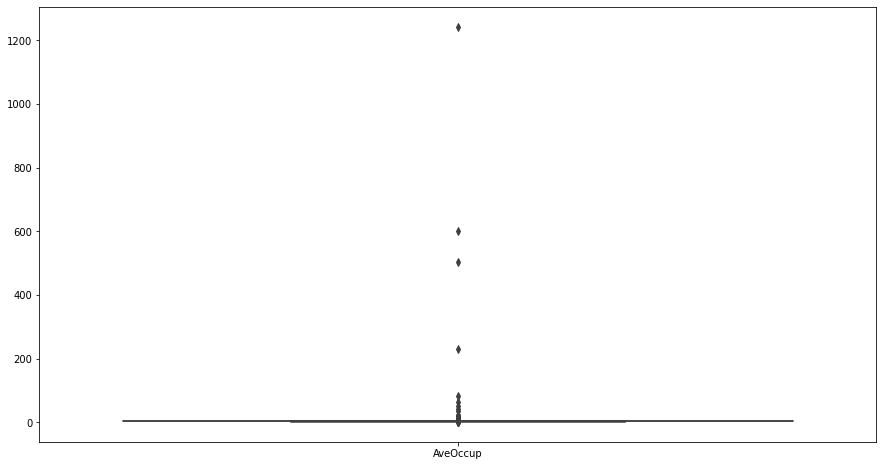

In [9]:
# feature distribution
# sns.histplot(data=data, x='MedInc')
# sns.histplot(data=data, x='HouseAge')
# sns.histplot(data=data, x='AveRooms')
# sns.histplot(data=data, x='AveBedrms')
# sns.histplot(data=data, x='AveOccup')
# sns.histplot(data=data, x='Latitude')
# sns.histplot(data=data, x='Longitude')
# 이런 경우에는 hisplot으로는 보기 힘드니 boxplot으로 보자
plt.figure(figsize=(15, 8))
# sns.boxplot(data=data.loc[:, ["MedInc", "HouseAge", "AveRooms", "AveBedrms", "AveOccup", "Latitude", "Longitude", "MedHouseVal"]])
# sns.boxplot(data = data.loc[:, ["AveRooms", "AveBedrms"]])
sns.boxplot(data = data.loc[:, ["AveOccup"]])

<AxesSubplot:>

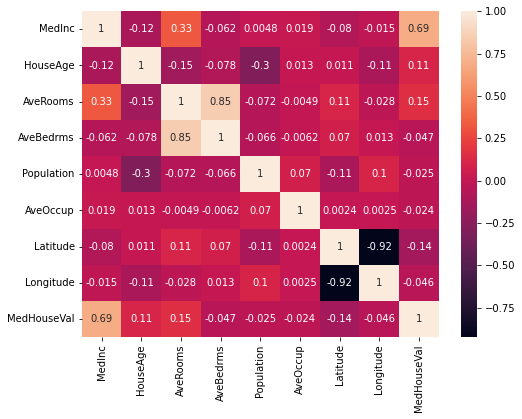

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True)

<AxesSubplot:>

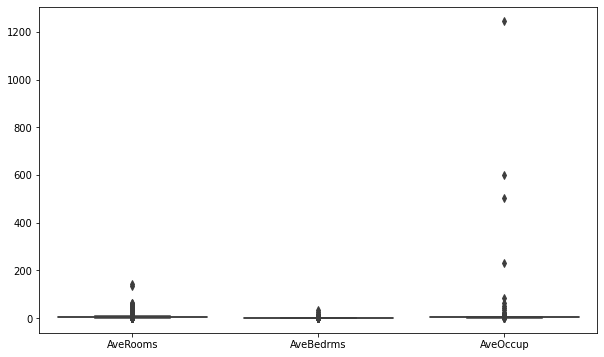

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data.loc[:, ["AveRooms", "AveBedrms", "AveOccup"]])

<AxesSubplot:xlabel='MedHouseVal', ylabel='Count'>

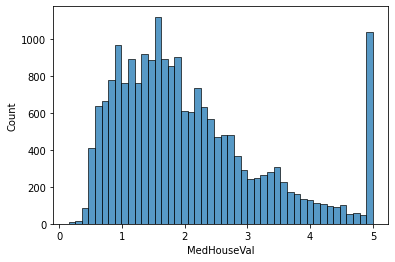

In [12]:
# target distribution
sns.histplot(data=data, x="MedHouseVal")

<AxesSubplot:xlabel='AveRooms', ylabel='Count'>

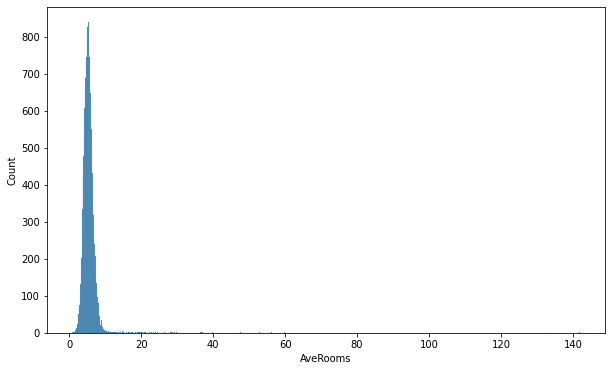

In [13]:
plt.figure(figsize=(10,6))
sns.histplot(data=data, x='AveRooms')

In [14]:
data.loc[data.AveRooms > 20, :]
# 직관적으로 아웃라이어 처리를 어떻게 해야될 지 모르겠으면 
# 하나씩 넣어보면서 회귀모델의 성능이 좋은것을 사용하면된다. eg. > 20 / > 50 / > 100

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
1024,3.1500,16.0,29.852941,5.323529,202.0,1.980392,38.52,-120.00,1.406
1102,2.4028,17.0,31.777778,9.703704,47.0,1.740741,40.06,-121.54,0.675
1234,4.4063,13.0,28.757282,5.300971,252.0,2.446602,38.26,-120.33,1.558
1238,3.3542,10.0,28.112903,5.604839,298.0,2.403226,38.29,-120.27,1.038
1239,3.0750,13.0,33.989691,6.824742,267.0,2.752577,38.31,-120.27,1.083
...,...,...,...,...,...,...,...,...,...
19736,6.1359,14.0,22.823529,6.352941,35.0,2.058824,40.12,-121.78,1.063
19975,2.1029,11.0,23.994152,5.157895,356.0,2.081871,36.12,-118.54,0.991
19976,3.1250,10.0,21.095238,5.285714,48.0,2.285714,36.19,-118.37,0.713
20093,2.0625,37.0,24.669118,4.897059,338.0,2.485294,38.12,-120.12,0.889


In [15]:
# data.loc[data.AveRooms > 100, :] # 1914, 1979row 제거
# data.loc[data.AveOccup > 200, :] # 3364, 13034, 16669, 19006 row 제거
# AveBedrms, Longitude column 제거

In [16]:
data = data.drop(index=[1914, 1979, 3364, 13034, 16669, 19006]) # remove outlier
data = data.drop(columns=["AveBedrms", "Longitude"]) # remove collinearity
data

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,MedHouseVal
0,8.3252,41.0,6.984127,322.0,2.555556,37.88,4.526
1,8.3014,21.0,6.238137,2401.0,2.109842,37.86,3.585
2,7.2574,52.0,8.288136,496.0,2.802260,37.85,3.521
3,5.6431,52.0,5.817352,558.0,2.547945,37.85,3.413
4,3.8462,52.0,6.281853,565.0,2.181467,37.85,3.422
...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,845.0,2.560606,39.48,0.781
20636,2.5568,18.0,6.114035,356.0,3.122807,39.49,0.771
20637,1.7000,17.0,5.205543,1007.0,2.325635,39.43,0.923
20638,1.8672,18.0,5.329513,741.0,2.123209,39.43,0.847


### 4. Training

- train-test split

- Standardization

- Model training

- Hyper-parameter tuning

- Evaluation

In [19]:
# 학습을 위한 training / test dataset 나누기
from sklearn.model_selection import train_test_split

#트테트테
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0xC0FFEE)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0xC0FFEE)

# 6 : 2 : 2 = train : validation : test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(12384, 8) (4128, 8) (12384,) (4128,)


In [21]:
# feature scaling
## 원래는 train data를 만들고 거기에 대한 eda를 하는게 맞지만
### sklearn data set이므로 간단하게 진행
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)
X_test = scaler.transform(X_test)

In [23]:
# 확인
X_train

array([[-1.17601944,  0.10850292, -0.45288606, ..., -0.00868   ,
         0.99834209, -1.31457603],
       [ 1.18715488,  0.42665141,  0.47835933, ..., -0.0655039 ,
         1.07323662, -1.47940183],
       [ 1.06546023,  1.38109688,  0.28551945, ..., -0.04575842,
         0.96557573, -1.43444934],
       ...,
       [-0.63090052, -0.84594255, -0.96876995, ...,  0.03905252,
        -0.89274496,  0.86312244],
       [ 1.20956132,  0.50618853, -0.02789518, ..., -0.02307157,
        -0.66338044,  0.66832831],
       [-1.32727596,  0.7447999 , -0.44326619, ..., -0.01722098,
         1.3915384 , -0.91999305]])

In [26]:
# 학습을 위한 라이브러리 세팅

from sklearn.linear_model import LinearRegression # 1. Linear Regression
from sklearn.linear_model import Lasso            # 2. Lasso
from sklearn.linear_model import Ridge            # 3. Ridge
from xgboost.sklearn import XGBRegressor          # 4. XGBoost
from lightgbm.sklearn import LGBMRegressor        # 5. LightGBM

from sklearn.metrics import mean_squared_error

In [29]:
# training

reg = LinearRegression()
reg2 = Lasso()
reg3 = Ridge()
reg4 = XGBRegressor()
reg5 = LGBMRegressor()

reg.fit(X_train, y_train)
reg2.fit(X_train, y_train)
reg3.fit(X_train, y_train)
reg4.fit(X_train, y_train)
reg5.fit(X_train, y_train)

pred_train = reg.predict(X_train)
pred_train2 = reg2.predict(X_train)
pred_train3 = reg3.predict(X_train)
pred_train4 = reg4.predict(X_train)
pred_train5 = reg5.predict(X_train)

pred_val = reg.predict(X_val)
pred_val2 = reg2.predict(X_val)
pred_val3 = reg3.predict(X_val)
pred_val4 = reg4.predict(X_val)
pred_val5 = reg5.predict(X_val)

mse_train = mean_squared_error(y_train, pred_train)
mse_val = mean_squared_error(y_val, pred_val)
mse_train2 = mean_squared_error(y_train, pred_train2)
mse_val2 = mean_squared_error(y_val, pred_val2)
mse_train3 = mean_squared_error(y_train, pred_train3)
mse_val3 = mean_squared_error(y_val, pred_val3)
mse_train4 = mean_squared_error(y_train, pred_train4)
mse_val4 = mean_squared_error(y_val, pred_val4)
mse_train5 = mean_squared_error(y_train, pred_train5)
mse_val5 = mean_squared_error(y_val, pred_val5)

print("1. Linear Regression\t, train = %.4f, val = %.4f" %(mse_train, mse_val))
print("2. Lasso\t\t, train = %.4f, val = %.4f" %(mse_train2, mse_val2))
print("3. Ridge\t\t, train = %.4f, val = %.4f" %(mse_train3, mse_val3))
print("4. XGBoost\t\t, train = %.4f, val = %.4f" %(mse_train4, mse_val4))
print("5. LightGBM\t\t, train = %.4f, val = %.4f" %(mse_train5, mse_val5))

1. Linear Regression	, train = 0.5336, val = 0.5122
2. Lasso		, train = 1.3490, val = 1.2857
3. Ridge		, train = 0.5336, val = 0.5122
4. XGBoost		, train = 0.0666, val = 0.5820
5. LightGBM		, train = 0.1474, val = 0.4629


In [37]:
# Hyper-parameter tuning
## 1. Human Search
## 2. GridSearchCV : 주어진 hp의 조합을 모두 돌려보는 방식.
## 3. Bayesian Optimization(hyperopt, optuna, ...) : hyper-parameter를 최적화 하는 베이지안 방식을 사용

# GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth" : [3, 5, -1], # 3 
    "learnig_rate" : [0.1, 0.01], # 2
    "n_estimators" : [50, 100] # 2
}

# 3 x 2 x 3 = 18

gcv = GridSearchCV(reg5, param_grid, scoring="neg_mean_squared_error", verbose=1) # verbose = 1 or 2
gcv.fit(X_train, y_train)
# print(gcv.cv_results_)
print(gcv.best_estimator_)
print(gcv.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[LightGBM] [Warning] Unknown parameter: learnig_rate
[LightGBM] [Warning] Unknown parameter: learnig_rate
[LightGBM] [Warning] Unknown parameter: learnig_rate
[LightGBM] [Warning] Unknown parameter: learnig_rate
[LightGBM] [Warning] Unknown parameter: learnig_rate
[LightGBM] [Warning] Unknown parameter: learnig_rate
[LightGBM] [Warning] Unknown parameter: learnig_rate
[LightGBM] [Warning] Unknown parameter: learnig_rate
[LightGBM] [Warning] Unknown parameter: learnig_rate
[LightGBM] [Warning] Unknown parameter: learnig_rate
[LightGBM] [Warning] Unknown parameter: learnig_rate
[LightGBM] [Warning] Unknown parameter: learnig_rate
[LightGBM] [Warning] Unknown parameter: learnig_rate
[LightGBM] [Warning] Unknown parameter: learnig_rate
[LightGBM] [Warning] Unknown parameter: learnig_rate
[LightGBM] [Warning] Unknown parameter: learnig_rate
[LightGBM] [Warning] Unknown parameter: learnig_rate
[LightGBM] [Warning] Unknown parameter

### 5. Test(Prediction)

In [ ]:
# training set과 같은 전처리!
final_model = gcv.best_estimator_


In [30]:
# prediction!

result = reg.predict(X_test)
result2 = reg2.predict(X_test)
result3 = reg3.predict(X_test)
result4 = reg4.predict(X_test)
result5 = reg5.predict(X_test)

In [32]:
# Summary!
print("---------- Linear Regression ---------")
print('MSE in training: %.4f' % mean_squared_error(y_test, result))

print("---------- Lasso ---------")
print('MSE in training: %.4f' % mean_squared_error(y_test, result2))

print("---------- Ridge ---------")
print('MSE in training: %.4f' % mean_squared_error(y_test, result3))

print("---------- XGBoost ---------")
print('MSE in training: %.4f' % mean_squared_error(y_test, result4))

print("---------- LightGBM ---------")
print('MSE in training: %.4f' % mean_squared_error(y_test, result5))

---------- Linear Regression ---------
MSE in training: 0.4888
---------- Lasso ---------
MSE in training: 1.3254
---------- Ridge ---------
MSE in training: 0.4888
---------- XGBoost ---------
MSE in training: 0.5504
---------- LightGBM ---------
MSE in training: 0.4451
